1. К текущему датасету (https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data) был добавлен атрибут 'Year of Birth',
   который показывает дату рождения сотрудников, при помощи конвертации в формат .xlsx.
   
2. Очистка датасета:

In [1]:
# Конвертация файла в формат .csv после добавления нового атрибута 'Year of Birth'

import pandas as pd

# Чтение файла .xlsx
df = pd.read_excel('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_2.xlsx')

# Сохранение в файл .csv с кодировкой UTF-8
df.to_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_2.csv', encoding='utf-8', index=False)


In [3]:
# Проверка на правильность содержащихся данных в файле

import numpy as np
import pandas as pd
df = pd.read_csv ('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_2.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Year of Birth
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1991
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1995
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1978
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1987
4,52.0,Male,Master's,Director,20.0,200000.0,1971


In [25]:
# Удалим выбросы, а потом заменим все пропущенные значения на медианные, соответствующие каждому атрибуту.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_2.csv')
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_2.csv')


q1 = data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']].quantile(0.25)
q3 = data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']].quantile(0.75)
q_range = q3 - q1
lower_bound = q1 - 1.5 * q_range
upper_bound = q3 + 1.5 * q_range


data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']] = data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']][(data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']]>lower_bound) & (data[['Age', 'Years of Experience', 'Salary', 'Year of Birth']] < upper_bound)]


# Медианные значения для каждого атрибута
median_age = data['Age'].median()
median_experience = data['Years of Experience'].median()
median_salary = data['Salary'].median()
median_birth = data['Year of Birth'].median()


# Замена удаленных значений на медианные
data['Age'] = data['Age'].fillna(median_age)
data['Years of Experience'] = data['Years of Experience'].fillna(median_experience)
data['Salary'] = data['Salary'].fillna(median_salary)
data['Year of Birth'] = data['Year of Birth'].fillna(median_birth)


data.to_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv', index=False)


# В файле Data_Salary_d4.csv нет выбросов, они заменены на медианные значения. 
# Дубликаты и кривые данные в документе не были обнаружены, формат числовых значений одинаковый.

3. Графики зависимости одной переменной от другой (plt.scatter), описание кластеров (построить несколько разных графиков, найти ярковыраженные группы).

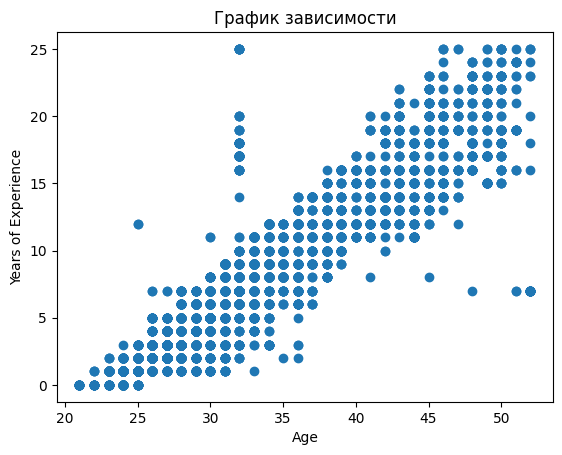

In [1]:
# График зависисмости атрибутов 'Age' - 'Years of Experience'

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

x = data['Age']
y = data['Years of Experience']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('График зависимости')
plt.show()

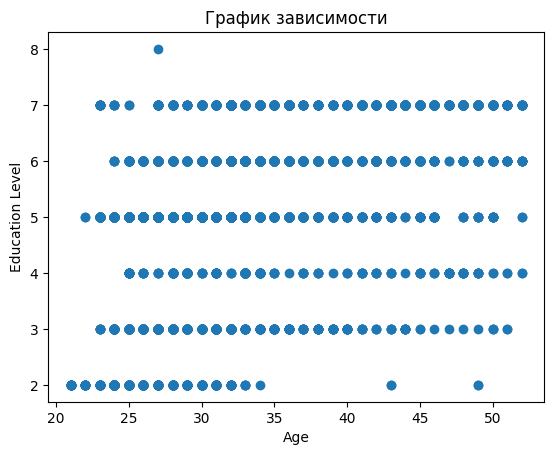

In [77]:
# График зависисмости атрибутов 'Age' - 'Education Level'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')

x = data['Age']
y = data['Education Level']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('График зависимости')
plt.show()

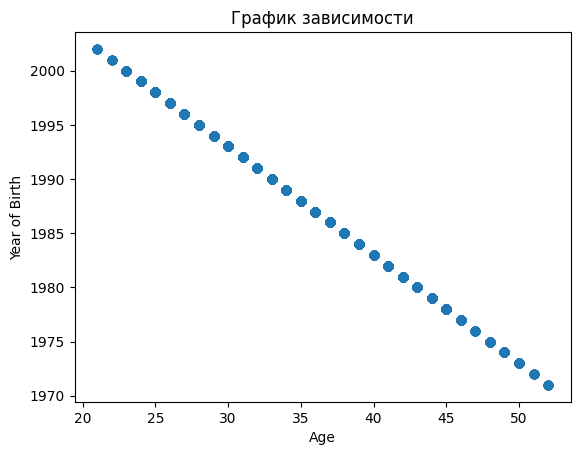

In [81]:
# График зависисмости атрибутов 'Age' - 'Year of Birth'

x = data['Age']
y = data['Year of Birth']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Year of Birth')
plt.title('График зависимости')
plt.show()

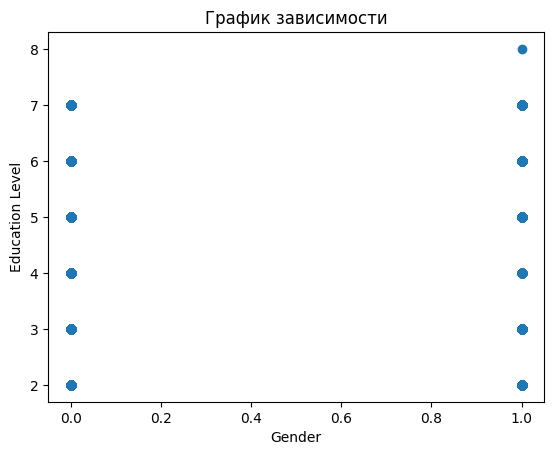

In [82]:
# График зависисмости атрибутов 'Gender' - 'Education Level'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

x = data['Gender']
y = data['Education Level']

plt.scatter(x, y)
plt.xlabel('Gender')
plt.ylabel('Education Level')
plt.title('График зависимости')
plt.show()

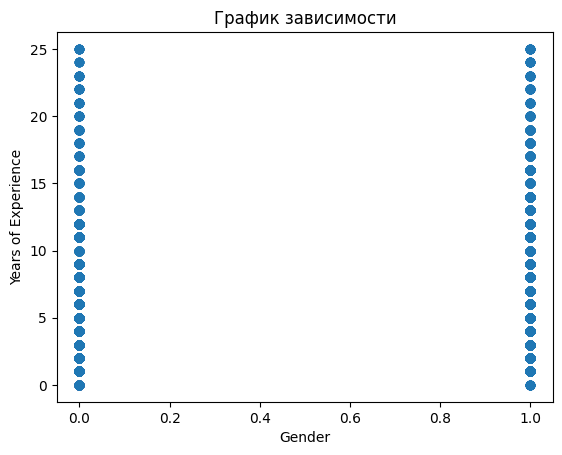

In [6]:
# График зависисмости атрибутов 'Gender' - 'Years of Experience'

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

x = data['Gender']
y = data['Years of Experience']

plt.scatter(x, y)
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.title('График зависимости')
plt.show()

По данным графикам невозможно найти ярковыраженные группы, так как к ним еще не применен метод кластеризации.

Сначала постараемся разбить на кластеры эти графики, наугад задав число кластеров k равным 7.

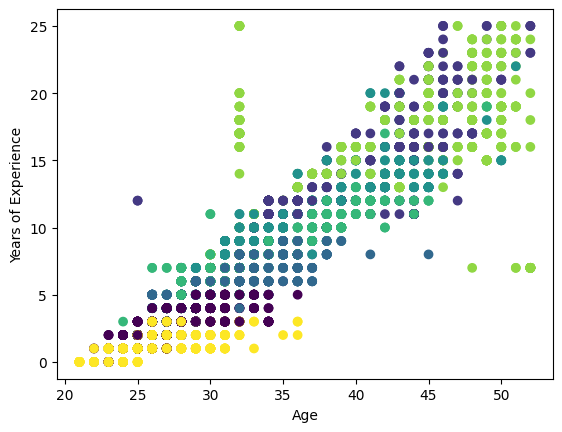

In [62]:
# График зависисмости атрибутов 'Age' - 'Years of Experience'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Загружаем данные из файла CSV
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

data_new = data.drop('Job Title', axis=1)

# Заполняем отсутствующие значения средними значениями столбцов
imputer = SimpleImputer()
data_new = pd.DataFrame(imputer.fit_transform(data_new), columns=data_new.columns)

# Создаем объект KMeans и выполняем кластеризацию
k=7
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(data_new)

# Получаем метки кластеров
labels = kmeans.labels_

# Добавляем столбец с метками кластеров в DataFrame
data_new['cluster'] = labels

# Отображаем данные на графике
plt.scatter(data_new['Age'], data_new['Years of Experience'], c=data_new['cluster'])
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.show()


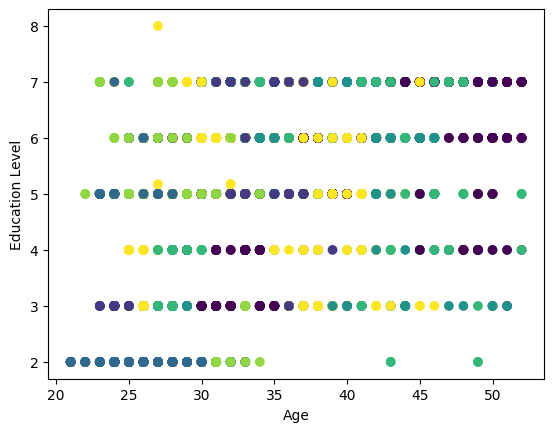

In [92]:
# График зависисмости атрибутов 'Age' - 'Education Level'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')

# Добавляем столбец с метками кластеров в DataFrame
data_new['cluster'] = labels

# Отображаем данные на графике
plt.scatter(data_new['Age'], data_new['Education Level'], c=data_new['cluster'])
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.show()

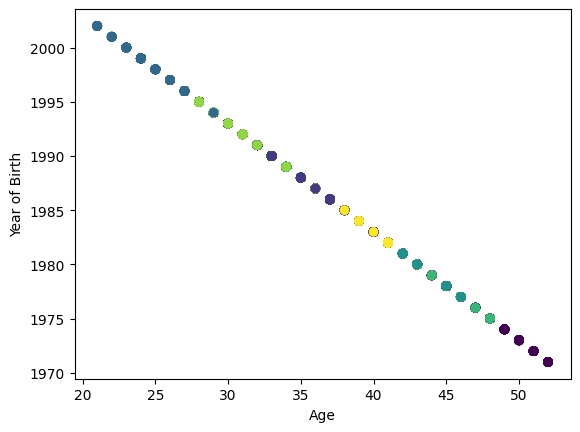

In [93]:
# График зависисмости атрибутов 'Age' - 'Year of Birth'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Добавляем столбец с метками кластеров в DataFrame
data_new['cluster'] = labels

# Отображаем данные на графике
plt.scatter(data_new['Age'], data_new['Year of Birth'], c=data_new['cluster'])
plt.xlabel('Age')
plt.ylabel('Year of Birth')
plt.show()

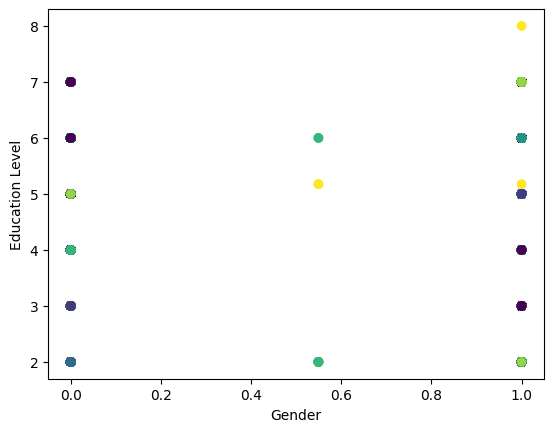

In [94]:
# График зависисмости атрибутов 'Gender' - 'Education Level'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Добавляем столбец с метками кластеров в DataFrame
data_new['cluster'] = labels

# Отображаем данные на графике
plt.scatter(data_new['Gender'], data_new['Education Level'], c=data_new['cluster'])
plt.xlabel('Gender')
plt.ylabel('Education Level')
plt.show()

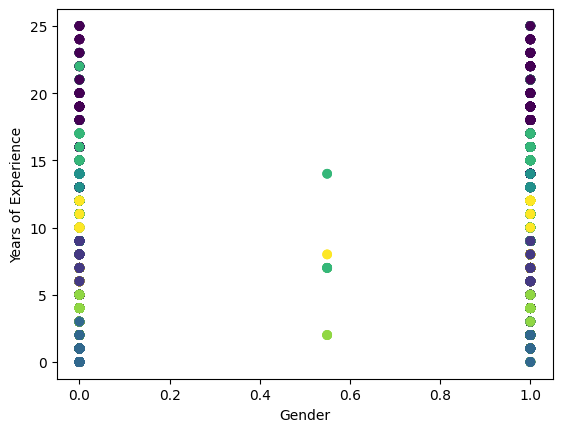

In [95]:
# График зависисмости атрибутов 'Gender' - 'Years of Experience'

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Добавляем столбец с метками кластеров в DataFrame
data_new['cluster'] = labels

# Отображаем данные на графике
plt.scatter(data_new['Gender'], data_new['Years of Experience'], c=data_new['cluster'])
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.show()

Кластеры сложно определить по данным графикам так как кластеризация была проведена без подготовки, то есть не было определено оптимальное 
количество кластеров и коэффициент силуэта.

4. Применяем метод Kmeans к датасету по образцу.

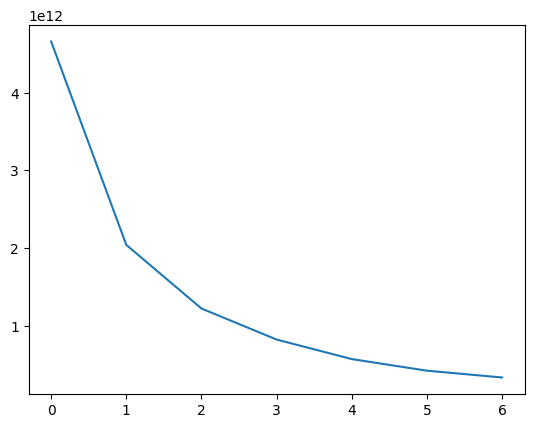

In [35]:
# Определяем оптимальное количество кластеров Методом Локтя

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Загружаем данные из файла CSV
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

data_new = data.drop('Job Title', axis=1)

# Заполняем отсутствующие значения средними значениями столбцов
imputer = SimpleImputer()
data_new = pd.DataFrame(imputer.fit_transform(data_new), columns=data_new.columns)

k=4
kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
kmeans.fit(data_new)

# Получаем метки кластеров
labels = kmeans.labels_

# Количество кластеров Методом Локтя
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10)
    kmeans.fit(data_new)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

Чтобы по графику определить оптимальное количество кластеров, нужно выбрать такую точку k, после которой график
начинает линейно убывать. В данном случае можем выбрать значение k=3.

In [36]:
# Применяем Метод Анализа Силуэта по формуле: (p-q)/max(p,q), где p - это среднее расстояние до точек ближайшего кластера, 
# q - среднее внутрикластерное расстояние до всех точек в его собственном кластере.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Загружаем данные из файла CSV
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

data_new = data.drop('Job Title', axis=1)

# Заполняем отсутствующие значения средними значениями столбцов
imputer = SimpleImputer()
data_new = pd.DataFrame(imputer.fit_transform(data_new), columns=data_new.columns)

k=4
kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
kmeans.fit(data_new)

# Получаем метки кластеров
labels = kmeans.labels_


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10)
    kmeans.fit(data_new)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data_new, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6296451516441448
For n_clusters=3, the silhouette score is 0.6040796777706283
For n_clusters=4, the silhouette score is 0.5719423764031385
For n_clusters=5, the silhouette score is 0.5596644577714781
For n_clusters=6, the silhouette score is 0.5640371982534133
For n_clusters=7, the silhouette score is 0.5752040939631329
For n_clusters=8, the silhouette score is 0.578148007033558


Коэффициент силуэта silhouette_score показывает качество кластрезации, то есть насколько один кластер похож на другой.
Коэффициент стремится к 1, что говорит о том, что каждый объект похож на другие объекты в кластере, к которому 
он отнесен при кластеризации.

In [40]:
# Теперь построим модель с количеством кластеров равным 3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import seaborn as sns


# Загружаем данные из файла CSV
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

data_new = data.drop('Job Title', axis=1)

# Заполняем отсутствующие значения средними значениями столбцов
imputer = SimpleImputer()
data_new = pd.DataFrame(imputer.fit_transform(data_new), columns=data_new.columns)

k=3
kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
kmeans.fit(data_new)

# Получаем метки кластеров
labels = kmeans.labels_

# Введем новый столбец в файл 'Cluster_Id'
data_new['Cluster_Id'] = kmeans.labels_
data_new.head()

,Age,Gender,Education Level,Years of Experience,Salary,Year of Birth,Cluster_Id
0,32.0,1.0,3.0,5.0,90000.0,1991.0,2
1,28.0,0.0,4.0,3.0,65000.0,1995.0,1
2,45.0,1.0,7.0,15.0,150000.0,1978.0,0
3,36.0,0.0,3.0,7.0,60000.0,1987.0,1
4,52.0,1.0,4.0,20.0,200000.0,1971.0,0


Теперь каждый сотрудник распределен в свой кластер.

<Axes: xlabel='Cluster_Id', ylabel='Age'>

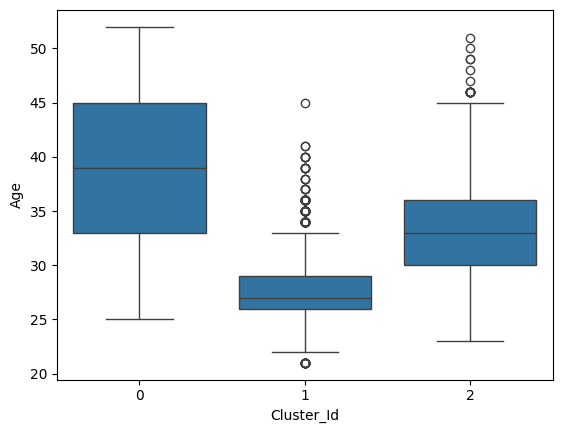

In [41]:
# График кластеризации атрибута 'Age'
sns.boxplot(x='Cluster_Id', y='Age', data=data_new)

<Axes: xlabel='Cluster_Id', ylabel='Years of Experience'>

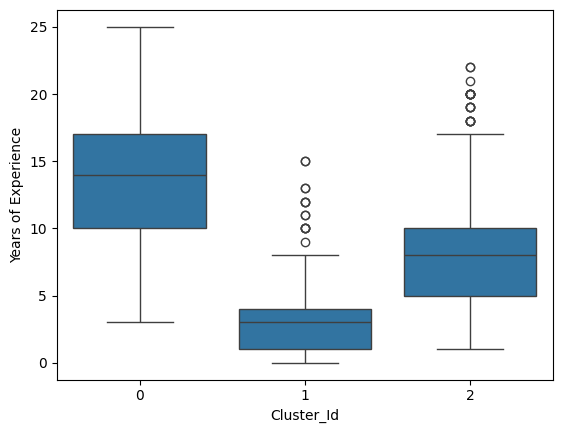

In [43]:
# График кластеризации атрибута 'Years of Experience'
sns.boxplot(x='Cluster_Id', y='Years of Experience', data=data_new)

<Axes: xlabel='Cluster_Id', ylabel='Year of Birth'>

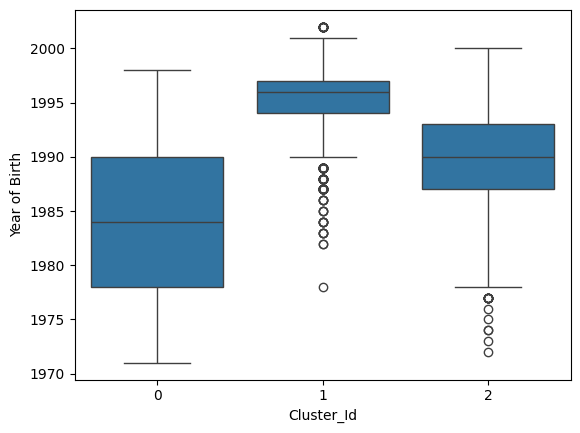

In [44]:
# График кластеризации атрибута 'Year of Birth'
sns.boxplot(x='Cluster_Id', y='Year of Birth', data=data_new)

<Axes: xlabel='Cluster_Id', ylabel='Education Level'>

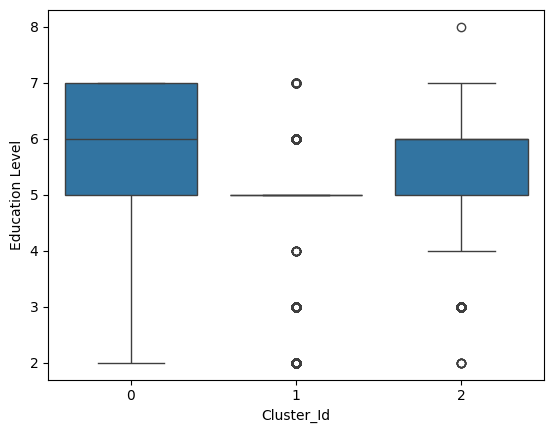

In [45]:
# График кластеризации атрибута 'Education Level'
sns.boxplot(x='Cluster_Id', y='Education Level', data=data_new)

<Axes: xlabel='Cluster_Id', ylabel='Salary'>

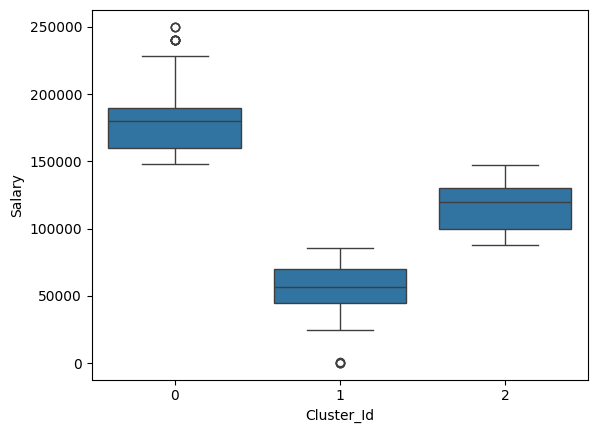

In [46]:
# График кластеризации атрибута 'Salary'
sns.boxplot(x='Cluster_Id', y='Salary', data=data_new)

Значения каждого атрибута были распределены на группы по 5 критериям, представленным на вертикальной оси графиков.

Теперь разобьем на кластеры графики зависисмости из П2.

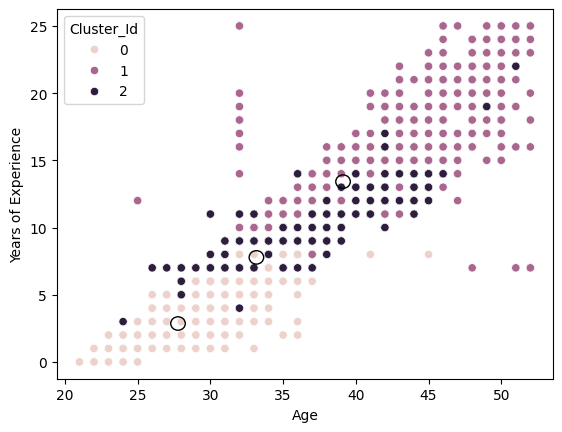

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import seaborn as sns


# Загружаем данные из файла CSV
data = pd.read_csv('C:/Users/саша/Desktop/3 КУРС/МАШ ОБУЧЕНИЕ/Data_Salary_n4.csv')

data['Education Level'] = data['Education Level'].replace({"Bachelor's": 3, "Master's": 4, "Bachelor's Degree": 5, "Master's Degree": 6, "High School": 2, "PhD": 7, "phD": 8})
data['Education Level'] = pd.to_numeric(data['Education Level'], errors='coerce')
data['Gender'] = data ['Gender'].replace({"Male": 1, "Female": 0})
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Выбираем два атрибута для кластеризации
data_new = data[['Age', 'Years of Experience']]

data_new = data.drop('Job Title', axis=1)

# Заполняем отсутствующие значения средними значениями столбцов
imputer = SimpleImputer()
data_new = pd.DataFrame(imputer.fit_transform(data_new), columns=data_new.columns)

k=3
kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
kmeans.fit(data_new)

# Получаем метки кластеров
labels = kmeans.labels_

# Введем новый столбец в файл 'Cluster_Id'
data_new['Cluster_Id'] = kmeans.labels_

# График кластеризации атрибутов 'Age' и 'Years of Experience'
sns.scatterplot(x='Age', y='Years of Experience', hue='Cluster_Id', data=data_new)
plt.xlabel('Age')
plt.ylabel('Years of Experience')

# Отображение окружностей вокруг среднего значения для каждого кластера
for cluster_id in range(k):
    cluster_mean = np.mean(data_new.loc[data_new['Cluster_Id'] == cluster_id, ['Age', 'Years of Experience']], axis=0)
    circle = plt.Circle((cluster_mean.iloc[0], cluster_mean.iloc[1]), radius=0.5, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.show()

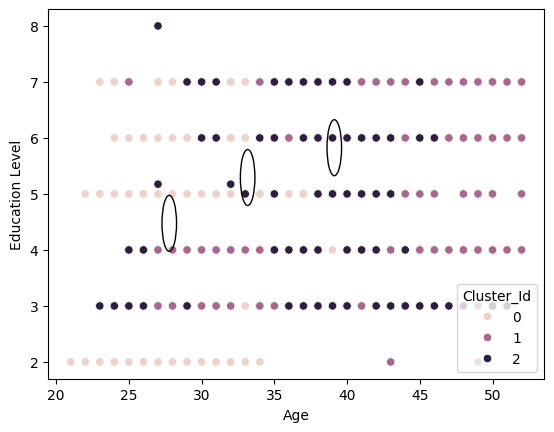

In [72]:
# График кластеризации атрибутов 'Age' и 'Education Level'
sns.scatterplot(x='Age', y='Education Level', hue='Cluster_Id', data=data_new)
plt.xlabel('Age')
plt.ylabel('Education Level')

# Отображение окружностей вокруг среднего значения для каждого кластера
for cluster_id in range(k):
    cluster_mean = np.mean(data_new.loc[data_new['Cluster_Id'] == cluster_id, ['Age', 'Education Level']], axis=0)
    circle = plt.Circle((cluster_mean.iloc[0], cluster_mean.iloc[1]), radius=0.5, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.show()

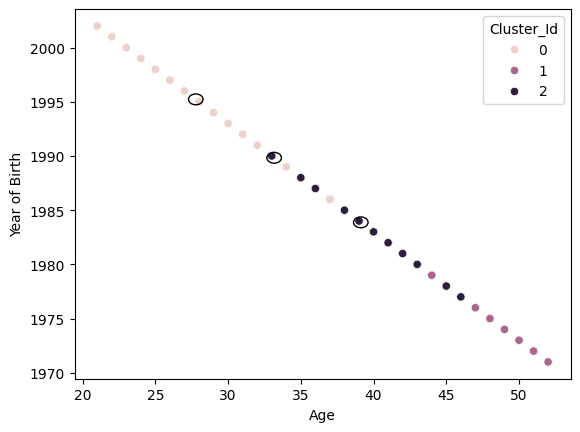

In [73]:
# График кластеризации атрибутов 'Age' и 'Year of Birth'
sns.scatterplot(x='Age', y='Year of Birth', hue='Cluster_Id', data=data_new)
plt.xlabel('Age')
plt.ylabel('Year of Birth')

# Отображение окружностей вокруг среднего значения для каждого кластера
for cluster_id in range(k):
    cluster_mean = np.mean(data_new.loc[data_new['Cluster_Id'] == cluster_id, ['Age', 'Year of Birth']], axis=0)
    circle = plt.Circle((cluster_mean.iloc[0], cluster_mean.iloc[1]), radius=0.5, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.show()

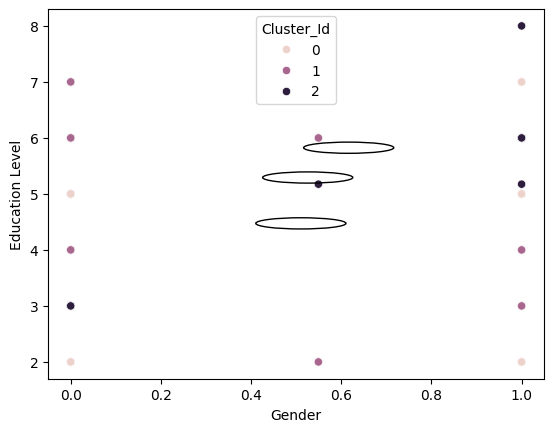

In [75]:
# График кластеризации атрибутов 'Gender' и 'Education Level'
sns.scatterplot(x='Gender', y='Education Level', hue='Cluster_Id', data=data_new)
plt.xlabel('Gender')
plt.ylabel('Education Level')

# Отображение окружностей вокруг среднего значения для каждого кластера
for cluster_id in range(k):
    cluster_mean = np.mean(data_new.loc[data_new['Cluster_Id'] == cluster_id, ['Gender', 'Education Level']], axis=0)
    circle = plt.Circle((cluster_mean.iloc[0], cluster_mean.iloc[1]), radius=0.1, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.show()

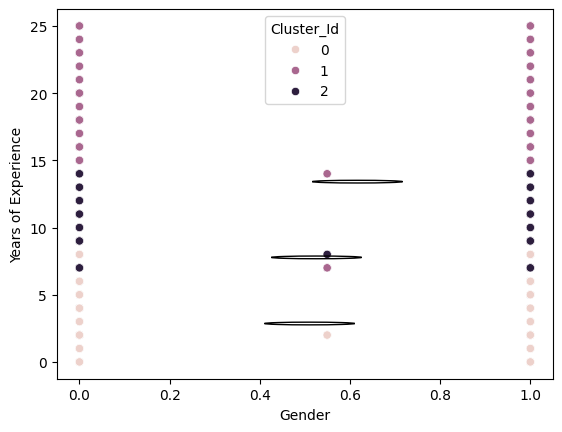

In [76]:
# График кластеризации атрибутов 'Gender' и 'Years of Experience'
sns.scatterplot(x='Gender', y='Years of Experience', hue='Cluster_Id', data=data_new)
plt.xlabel('Gender')
plt.ylabel('Years of Experience')

# Отображение окружностей вокруг среднего значения для каждого кластера
for cluster_id in range(k):
    cluster_mean = np.mean(data_new.loc[data_new['Cluster_Id'] == cluster_id, ['Gender', 'Years of Experience']], axis=0)
    circle = plt.Circle((cluster_mean.iloc[0], cluster_mean.iloc[1]), radius=0.1, color='black', fill=False)
    plt.gca().add_patch(circle)

plt.show()

После кластеризации тех же графиков зависимости из П2 после определения оптимального количества кластеров,
на них четко прослеживаются ярковраженные группы, объединенные по важным признакам.

Вывод:
В ходе данной лабораторной работы датасет был исследован при помощи кластеризации методом Kmeans.
Кластеризация помогает сформировать представления о данных выборки, разделив их на отдельные группы по конкретным 
признакам внутри нее. Это облегчает работу для дальнейшего исследования датасета.

П2: Перед проведением кластеризации в датасете был добавлен новый атрибут 'Year of Age' (год рождения сотрудника), 
а также была осуществлена очистка путем устранения выбросов и заменой пропущенных значений в столбцах на медианные 
значения для конкретного атрибута. Кривых данных и дубликатов в выборке обнаружено не было.

П3: Без кластеризации данных ярковыраженные группы на графиках зависимостей отсутствуют. При выполнении кластеризации с 
неоптимальным количеством кластеров группы значений выражены неявно.

П4: Было установлено, что перед выполнением кластеризации обязательным шагом является определение оптимального количества кластеров, 
для этого использовался Метод Локтя (для данного датасета оптимальное число кластеров k=3). Необходимость этого метода 
наглядно демонстрируют пункты 3 и 4.

Также был использован Метод Анализа Силуэта, показывающий качество кластеризации. На основе его значений можно
сделать вывод о том, что кластеры относительно похожи между собой.

Наиболее наглядно кластеризацию можно увидеть на графике атрибутов 'Age' - 'Years of Experience', в силу их линейной 
зависимости и большей разнородности данных, чем, например, у графика зависимости 'Age' - 'Year of Birth'.
Среднее значение для каждого кластера обозначено черным кружком.